In [33]:
#********************************************************************************************************************************************
#                                                                                                                                           *
#                                                 Linear Discriminant Analysis (LDA)                                                        *
#                                                                                                                                           *
#         - This code implements a Linear Discriminant Analysis (LDA) model for dimensionality reduction and visualization.                 *
#         - It reads a dataset from a CSV file, fits the LDA model to the data, and transforms the dataset into a new feature space.        *
#         - The code then generates scatter plots, histograms, contour plots, and 2D plots to visualize the transformed data.               *
#         - Additionally, it prints the linear discriminants and the within-class and between-class scatter matrices (S_W and S_B).         *
#                                                                                                                                           *
#********************************************************************************************************************************************

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=np.ComplexWarning)                                   # Suppress ComplexWarning warnings

In [35]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components                                                        # Number of components to keep
        self.linear_discriminants = None                                                        # Placeholder for linear discriminants

    def fit(self, X, y):

        """
          * Fit the LDA model to the dataset.

          Parameters:
                     - X: Input features, a NumPy array of shape (n_samples, n_features)
                     - y: Target labels, a NumPy array of shape (n_samples,)

          * This method calculates the within-class scatter matrix (S_W) and the between-class scatter matrix (S_B),
            then solves the eigenvalue problem for (S_W)^-1 * S_B to find the linear discriminants.

        """

        n_features = X.shape[1]                                                                 # Number of features in the dataset
        class_labels = np.unique(y)                                                             # Unique class labels
        mean_overall = np.mean(X, axis=0)                                                       # Mean of the overall dataset
        S_W = np.zeros((n_features, n_features))                                                # Initialize within-class scatter matrix
        S_B = np.zeros((n_features, n_features))                                                # Initialize between-class scatter matrix

        for c in class_labels:
            X_c = X[y == c]                                                                     # Samples belonging to class c
            mean_c = np.mean(X_c, axis=0)                                                       # Mean of class c
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)                                           # Update within-class scatter matrix
            n_c = X_c.shape[0]                                                                  # Number of samples in class c
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)                          # Difference between class mean and overall mean
            S_B += n_c * (mean_diff).dot(mean_diff.T)                                           # Update between-class scatter matrix

        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))                  # Solve the eigenvalue problem
        eigenvectors = eigenvectors.T                                                           # Transpose eigenvectors
        indices = np.argsort(abs(eigenvalues))[::-1]                                            # Sort eigenvalues in descending order
        self.linear_discriminants = eigenvectors[indices[:self.n_components]]                   # Select top n_components eigenvectors


        # Print linear discriminants
        print("\n\n*****************************************************************************************************************************")
        print("Linear Discriminants:")
        print(self.linear_discriminants)

        # Print S_W and S_B
        print("\n\n*****************************************************************************************************************************")
        print("\nWithin-Class Scatter Matrix (S_W):\n", S_W)
        print("\n\n*****************************************************************************************************************************")
        print("\nBetween-Class Scatter Matrix (S_B):\n", S_B)
        print("\n\n*****************************************************************************************************************************\n\n")

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [36]:
def banner():
  print("""
******************************************************************************************************************************
*                                         Linear Discriminant Analysis (LDA)                                                 *
*                                                                                                                            *
*     Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to find the linear          *
*     combinations of features that best separate two or more classes. LDA maximizes the ratio of between-class variance     *
*     to within-class variance in the data, ensuring maximum separability.                                                   *
*                                                                                                                            *
*             - S_W: Within-class scatter matrix                                                                             *
*             - S_B: Between-class scatter matrix                                                                            *
*             - Linear Discriminants: Directions maximizing the separation between classes                                   *
*                                                                                                                            *
*     LDA is particularly useful for classification problems and visualizing high-dimensional data in lower dimensions.      *
*                                                                                                                            *
*     Usage:                                                                                                                 *
*             1. Load your dataset into a pandas DataFrame.                                                                  *
*             2. Extract features and labels from the dataset.                                                               *
*             3. Initialize the LDA class with the number of components (n_components) to retain.                            *
*             4. Fit the LDA model using the 'fit' method with your data matrix X and labels y.                              *
*             5. Transform the data into the new feature space using the 'transform' method.                                 *
*             6. Visualize the results using the provided plotting functions (scatter, histogram, contour, 2D plot).         *
*             7. Experiment with different values of n_components to find the optimal number of dimensions for your          *
*                analysis.                                                                                                   *
*                                                                                                                            *
******************************************************************************************************************************
    """)



banner()
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")                               # Load the dataset
X = dataset.drop(columns=["target"]).values                                                      # Extract features
y = dataset["target"].values                                                                     # Extract labels
lda = LDA(n_components=2)                                                                        # Initialize and fit LDA
lda.fit(X, y)
X_lda = lda.transform(X)                                                                         # Transform the dataset


******************************************************************************************************************************
*                                         Linear Discriminant Analysis (LDA)                                                 *
*                                                                                                                            *
*     Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to find the linear          *
*     combinations of features that best separate two or more classes. LDA maximizes the ratio of between-class variance     *
*     to within-class variance in the data, ensuring maximum separability.                                                   *
*                                                                                                                            *
*             - S_W: Within-class scatter matrix                                                              

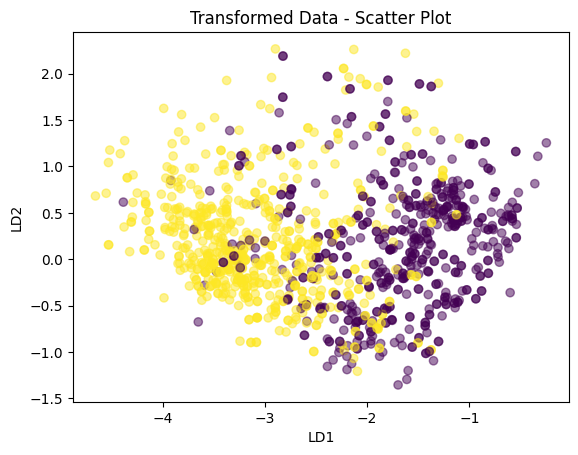

In [37]:
# Scatter Plot
def plot_scatter(X_lda, y):
    plt.figure()
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.title('Transformed Data - Scatter Plot')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.show()


plot_scatter(X_lda, y)

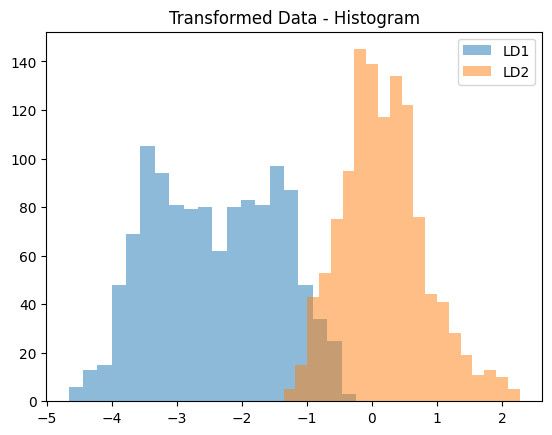

In [38]:
# Histogram
def plot_histogram(X_lda):
    plt.figure()
    for i in range(lda.n_components):
        plt.hist(X_lda[:, i], bins=20, alpha=0.5, label=f'LD{i+1}')
    plt.title('Transformed Data - Histogram')
    plt.legend()
    plt.show()


plot_histogram(X_lda)

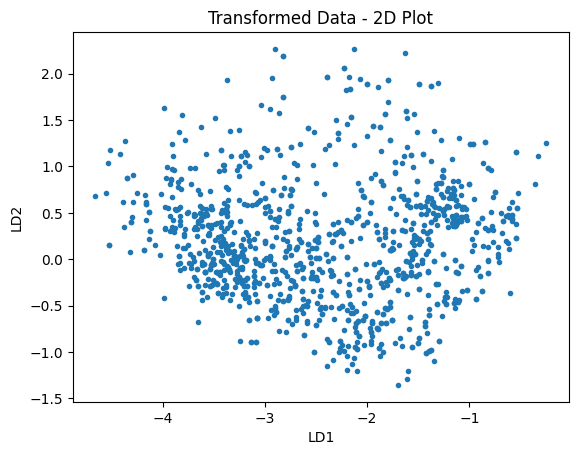

In [40]:
# 2D Plot
def plot_2d(X_lda):
    if lda.n_components >= 2:
        plt.figure()
        plt.plot(X_lda[:, 0], X_lda[:, 1], 'o', markersize=3)
        plt.title('Transformed Data - 2D Plot')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.show()


plot_2d(X_lda)